# Black Friday Sales Prediction 

This dataset comprises of sales transactions captured at a retail store. 

My aim is to to predict how much the customers will spend during Black Friday, using various features such as age and gender. The dataset I am going to use is the Black Friday dataset from Kaggle which contains about 550068 rows and 12 features that can be downloaded here. 

Train dataset: [this link](https://www.kaggle.com/sdolezel/black-friday?select=train.csv)  <br>
Test dataset: [this link](https://www.kaggle.com/sdolezel/black-friday?select=test.csv)

## Dataset Attribute Information

User_ID:  Unique ID of the user. <br>
Product_ID:  Unique ID of the product. <br>
Gender:  Indicates the gender of the person making the transaction. <br>
Age:  Indicates the age group of the person making the transaction. <br>
Occupation:  Shows the occupation of the user, already labeled with numbers 0 to 20. <br>
City_Category:  User's living city category. Cities are categorized into 3 different categories 'A', 'B' and 'C'.<br>
Stay_In_Current_City_Years:  Indicates how long the users has lived in this city.<br>
Marital_Status:  Is 0 if the user is not married and 1 otherwise.<br>
Product_Category_1 to _3:  Category of the product. All 3 are already labaled with numbers.<br>
Purchase:  Purchase amount.<br>

In [1]:
# The below libraries are needed for performing the machine learning and evaluating the machine learning models

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Reading the data

In [2]:
bf_sales = pd.read_csv('train.csv')
bf_sales.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
bf_sales.shape

(550068, 12)

The dataframe has 550068 rows and 12 columns.

In [4]:
bf_sales.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


The describe function shows us the descriptive statistics of our data and the shape of dataset distribution. 

In [5]:
bf_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


Using the info function I can see above that there are a few null values present in the Product_Category_2 and Product_Category_3 column as the count type does not match the RangeIndex of 550068. I can also see the types of variables present in these columns. 

In [6]:
bf_sales.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

The isnull().sum() function will help in finding all the null values present in the columns. There are 173638 missing values and 383247 missing values in the Product_category_2 and Product_category_3 columns.

## Performing Data Visualization

Diving deeper into the data analysis, I want to find the following scenarios:

1.) Getting the count of the gender in the dataset

2.) Marital Status of Female vs Male

3.) Count of Purchases made by each Gender 

4.) Count of Purchases made by different Occupations

5.) Count of Purchases made by different Occupations across the Gender

6.) Age group with the maximum and minimum purchases 


#### Getting the count of the gender in the dataset

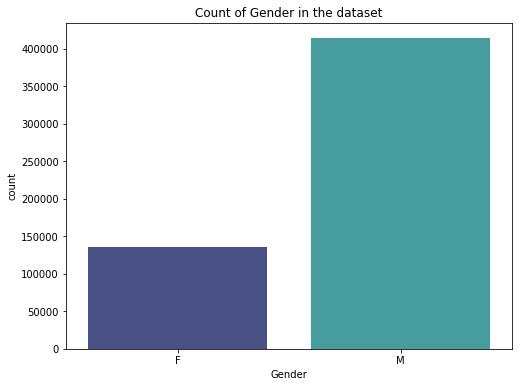

In [7]:
plt.figure(figsize = (8,6))
a = sns.countplot(x = 'Gender', data = bf_sales, palette = 'mako')
a.set(title = "Count of Gender in the dataset")
plt.show()

We can see that the count of Male gender is higher as compared to the Female in the dataset.

#### Marital Status of Female vs Male

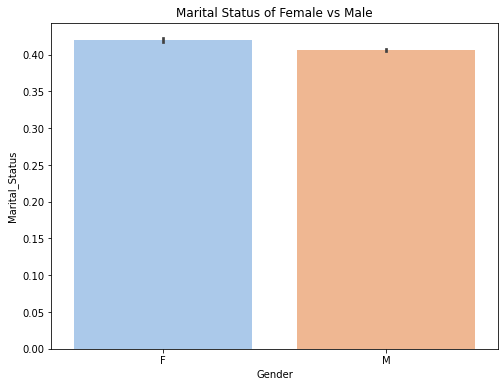

In [8]:
plt.figure(figsize = (8,6))
b = sns.barplot(x = 'Gender', y = 'Marital_Status', palette = 'pastel', data = bf_sales)
b.set(title = "Marital Status of Female vs Male")
plt.show()

The above visualization shows us that the count of the female gender being married is slightly higher compared to the male gender.

#### Count of Purchases made by each Gender 

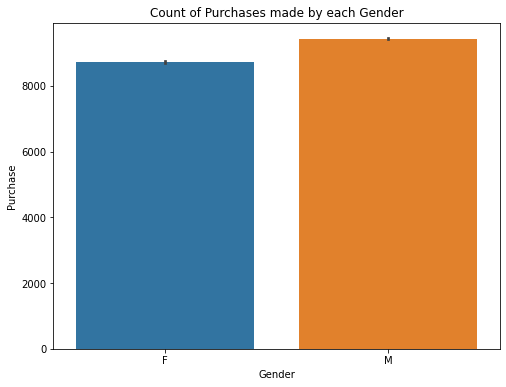

In [9]:
plt.figure(figsize = (8,6))
c = sns.barplot(x = 'Gender', y = 'Purchase', data = bf_sales)
c.set(title = "Count of Purchases made by each Gender")
plt.show()

We can see from the above visualization that higher purchases have been done by the males as compared to the females.

#### Count of Purchases made by different Occupations

The types of occupation codes are given by numbers. Hence, different numbers correspond to different occupations. 

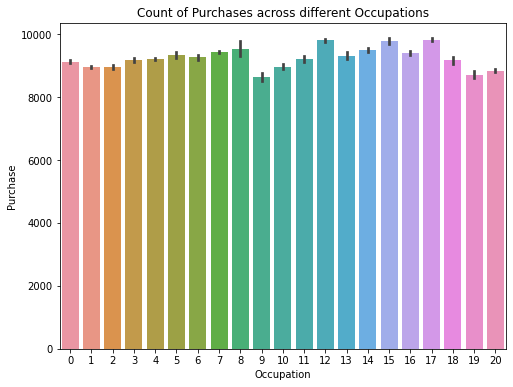

In [10]:
plt.figure(figsize = (8,6))
d = sns.barplot(x = 'Occupation', y = 'Purchase', data = bf_sales)
d.set(title = "Count of Purchases across different Occupations")
plt.show()

From the above graph we can see that the occupation codes 12,15,17 have higher purchases and we can say that the Occupation has a direct effect on the purchases done by the customer.

#### Count of Purchases made by different Occupations across the Gender

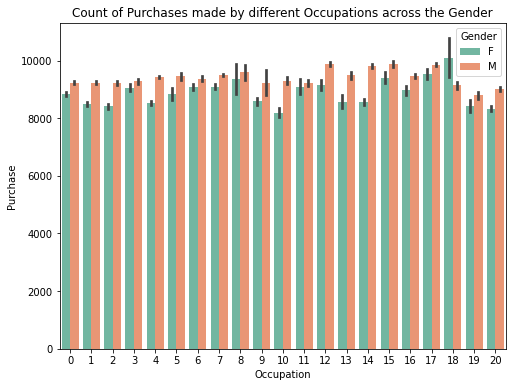

In [11]:
plt.figure(figsize = (8,6))
e = sns.barplot(x = 'Occupation', y = 'Purchase', hue = 'Gender', palette = 'Set2', data = bf_sales)
e.set(title = "Count of Purchases made by different Occupations across the Gender")
plt.show()

We can see from the above visualization that the female gender in the occupation 18 has the highest purchase compared to the male gender and other occupations.

#### Age group with the maximum and minimum purchases 

In [12]:
age_purchase = bf_sales.groupby(['Age'])['Purchase'].median()
age_purchase_sorted = pd.DataFrame(age_purchase.sort_values(ascending = False))
age_purchase_sorted

,Purchase
Age,
51-55,8130.0
55+,8105.5
36-45,8061.0
46-50,8036.0
26-35,8030.0
18-25,8027.0
0-17,7986.0


We can see that the maximum purchases are made by the customers within the age group of 51-55 followed by the age group 55+. Also, the lowest purchases are made by the age category 0-17 as they are mostly children and teenagers and who might not have started earning for themselves.

## Finding the Correlation among the variables 

In [13]:
# Using transpose for viewing the descriptive statistics
bf_sales.describe().T 

,count,mean,std,min,25%,50%,75%,max
User_ID,550068.0,1.003029e+06,1727.591586,1000001.0,1001516.0,1003077.0,1004478.0,1006040.0
Occupation,550068.0,8.076707e+00,6.522660,0.0,2.0,7.0,14.0,20.0
Marital_Status,550068.0,4.096530e-01,0.491770,0.0,0.0,0.0,1.0,1.0
Product_Category_1,550068.0,5.404270e+00,3.936211,1.0,1.0,5.0,8.0,20.0
Product_Category_2,376430.0,9.842329e+00,5.086590,2.0,5.0,9.0,15.0,18.0
Product_Category_3,166821.0,1.266824e+01,4.125338,3.0,9.0,14.0,16.0,18.0
Purchase,550068.0,9.263969e+03,5023.065394,12.0,5823.0,8047.0,12054.0,23961.0


In [14]:
# Checking the correlation of the values
bf_sales.corr()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
User_ID,1.000000,-0.023971,0.020443,0.003825,0.001529,0.003419,0.004716
Occupation,-0.023971,1.000000,0.024280,-0.007618,-0.000384,0.013263,0.020833
Marital_Status,0.020443,0.024280,1.000000,0.019888,0.015138,0.019473,-0.000463
Product_Category_1,0.003825,-0.007618,0.019888,1.000000,0.540583,0.229678,-0.343703
Product_Category_2,0.001529,-0.000384,0.015138,0.540583,1.000000,0.543649,-0.209918
Product_Category_3,0.003419,0.013263,0.019473,0.229678,0.543649,1.000000,-0.022006
Purchase,0.004716,0.020833,-0.000463,-0.343703,-0.209918,-0.022006,1.000000


We can see that there is a positive correlation between Occupation and Purchase.

## Outlier Detection 

An outlier is an observation that lies at an abnormal distance from other values. This could be just a single data point or a cluster of data points. They need to be treated as they cause problems when performing any statistical analysis. For instance, they can make tests miss any significant findings or distort the true or real results. I can check the presence of any outliers with the use of a boxplot.

I want to check the outliers for the following cases:

1.) Purchases made by each Gender

2.) Purchases across different Occupations

3.) Purchases across different Age Groups

4.) Purchases across Product Category 1


#### Outliers in Purchases made by each Gender

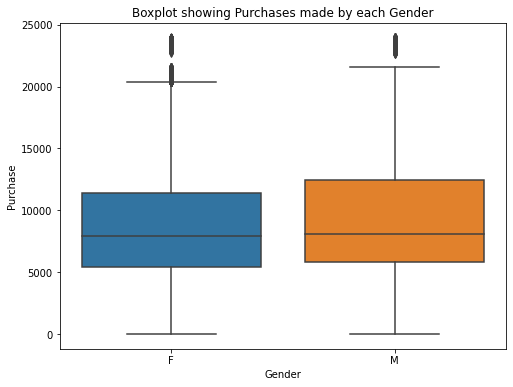

In [15]:
plt.figure(figsize = (8,6))
f = sns.boxplot(x = 'Gender', y = 'Purchase', data = bf_sales)
f.set(title = "Boxplot showing Purchases made by each Gender")
plt.show()

The above boxplot between 'Gender' and 'Purchase' show that the points above 20000 are outliers.

#### Outliers in Purchases across different Occupations

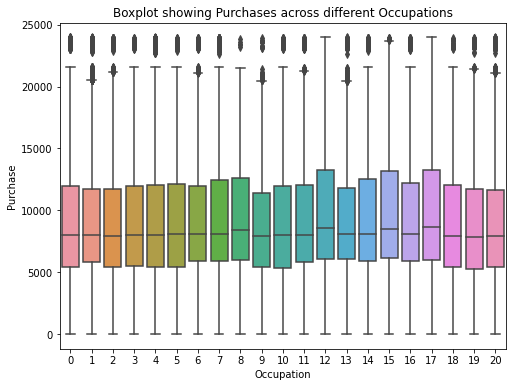

In [16]:
plt.figure(figsize = (8,6))
g = sns.boxplot(x = "Occupation", y = "Purchase", data = bf_sales)
g.set(title = "Boxplot showing Purchases across different Occupations")
plt.show()

We can from the above boxplot that the points above 20000 is an outlier. The purchase column has outliers which may effect the performance of the machine learning models.

#### Outliers in Purchases across different Age Groups

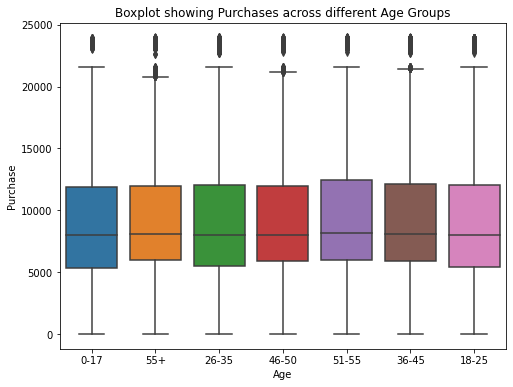

In [17]:
plt.figure(figsize = (8,6))
h = sns.boxplot(x = "Age", y = "Purchase", data = bf_sales)
h.set(title = "Boxplot showing Purchases across different Age Groups")
plt.show()

We can see below that the Age with Purchases again have some outliers present in them.

#### Outliers in Purchases across Product Category 1

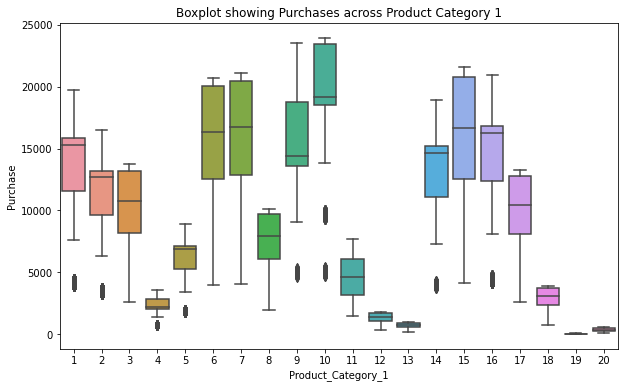

In [18]:
plt.figure(figsize=(10, 6))
i = sns.boxplot(x = "Product_Category_1", y = "Purchase", data = bf_sales)
i.set(title = "Boxplot showing Purchases across Product Category 1")
plt.show()

From the above boxplot we an see that there are outliers present in the Product category as well.

## Preprocessing the Data

Data preprocessing is a data mining technique which is used to transform the raw data in a useful and efficient format. Here, I am performing 3 tasks to preprocess the data which are as follows:

1.) Dropping a column Product_Category_3 that has more than 50% of values that are missing

2.) Imputing the missing values from column Product_Category_2

3.) Replacing 'P00' with no value and scaling the ProductID column


In [19]:
bf_sales.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In the 'Product_ID' column we see that there is a pattern that repeats in the entire column. This is the first 3 characters 'P00', which can be removed and standardized. 

#### Dropping a column Product_Category_3 that has more than 50% of values that are missing

In [20]:
# Dropping a column Product_Category_3 that has more than 50% of values that are missing
bf_sales.drop(['Product_Category_3'], axis = 1, inplace = True)
bf_sales.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,7969


If the number of missing values is more than 50%, then we can directly drop the column. I removed the Product_Category_3 column because, when I had checked the number of values showing NaN using bf_sales.isnull.sum(), the Product_Category_3 had around 383247 missing values. This is around approximately 70% of missing values. Hence, that column was no longer required in the dataset.

#### Imputing the missing values from column Product_Category_2

In [21]:
# Imputing the missing values from column Product_Category_2
bf_sales['Product_Category_2'] = bf_sales['Product_Category_2'].fillna(bf_sales['Product_Category_2'].mean())
bf_sales.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,9.842329,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.000000,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,9.842329,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.000000,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,9.842329,7969


Filled the null values present in Product_Category_2 with the mean.

#### Replacing 'P00' with no value and scaling the 'Product_ID' column

For effective model building, we can standardize the dataset using Feature Scaling. This can be done with StandardScaler() from sklearn’s preprocessing library.

In [22]:
# Replacing 'P00' with no value and scaling the ProductID column
bf_sales['Product_ID'] = bf_sales['Product_ID'].str.replace('P00', '')
ss = StandardScaler() #  It transforms the data in such a manner that it has mean as 0 and standard deviation as 1
bf_sales['Product_ID'] = ss.fit_transform(bf_sales['Product_ID'].values.reshape(-1, 1))

In [23]:
bf_sales.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,1000001,-1.028774,F,0-17,10,A,2,0,3,9.842329,8370
1,1000001,0.722139,F,0-17,10,A,2,0,1,6.000000,15200
2,1000001,-0.845799,F,0-17,10,A,2,0,12,9.842329,1422
3,1000001,-0.869157,F,0-17,10,A,2,0,12,14.000000,1057
4,1000002,1.077382,M,55+,16,C,4+,0,8,9.842329,7969


Reshaping means changing the shape of an array. The shape of an array is the number of elements in each dimension. By reshaping we can add or remove dimensions or change number of elements in each dimension.

-1 in reshape function is used when we don't know or want to explicitly tell the dimension of that axis. E.g,
If we have an array of shape (2,4) then reshaping it with (-1, 1), then the array will get reshaped in such a way that the resulting array has only 1 column and this is only possible by having 8 rows, hence, (8,1).

Similarly, I am replacing 'P00' with no value and scaling the 'Product_ID' column and reshaping it.

In [24]:
bf_sales.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Purchase                      0
dtype: int64

We can see that the missing values have been successfully imputed and now there are no null values present in the dataset.

In [25]:
bf_sales.shape

(550068, 11)

## Label Encoding few columns in the dataset

Label Encoding is a technique used to turn categorical variables to numeric values. Label Encoding refers to converting the labels into a numeric form so as to convert them into the machine-readable form. Machine learning algorithms can then decide in a better way how those labels must be operated. It is an important pre-processing step for the structured dataset in supervised learning.

In [26]:
#initial datatypes of the variables
bf_sales.dtypes

User_ID                         int64
Product_ID                    float64
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Purchase                        int64
dtype: object

In [27]:
# converting the object data types to numerical type
catergorical_columns = ['Gender', 'City_Category', 'Age']
le = LabelEncoder()
for i in catergorical_columns:
    bf_sales[i] = le.fit_transform(bf_sales[i])
    
bf_sales.dtypes    

User_ID                         int64
Product_ID                    float64
Gender                          int64
Age                             int64
Occupation                      int64
City_Category                   int64
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Purchase                        int64
dtype: object

The label encoding technique will now replace all the categorical variables to numeric for easier computation.

In [28]:
# Changing the values in the Stay_In_Current_City_Years column from 4+ to 4
bf_sales['Stay_In_Current_City_Years'] = bf_sales['Stay_In_Current_City_Years'].replace('4+','4')

In [29]:
# Changing the gender, Age and Stay_In_Current_City_Years to integer types
bf_sales['Gender'] = bf_sales['Gender'].astype(int)
bf_sales['Age'] = bf_sales['Age'].astype(int)
bf_sales['Stay_In_Current_City_Years'] = bf_sales['Stay_In_Current_City_Years'].astype(int)

In [30]:
# Changing the type of city_category from int to category
bf_sales['City_Category'] = bf_sales['City_Category'].astype('category') 

Only for the city_category column, I first converted it to an interger/numeric type and then converted it to a categorical type.

In [31]:
bf_sales.dtypes 

User_ID                          int64
Product_ID                     float64
Gender                           int64
Age                              int64
Occupation                       int64
City_Category                 category
Stay_In_Current_City_Years       int64
Marital_Status                   int64
Product_Category_1               int64
Product_Category_2             float64
Purchase                         int64
dtype: object

In [32]:
bf_sales.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,1000001,-1.028774,0,0,10,0,2,0,3,9.842329,8370
1,1000001,0.722139,0,0,10,0,2,0,1,6.000000,15200
2,1000001,-0.845799,0,0,10,0,2,0,12,9.842329,1422
3,1000001,-0.869157,0,0,10,0,2,0,12,14.000000,1057
4,1000002,1.077382,1,6,16,2,4,0,8,9.842329,7969
5,1000003,0.182947,1,2,15,0,3,0,1,2.000000,15227
6,1000004,0.099246,1,4,7,1,2,1,1,8.000000,19215
7,1000004,1.668157,1,4,7,1,2,1,1,15.000000,15854
8,1000004,-0.754312,1,4,7,1,2,1,1,16.000000,15686
9,1000005,0.975189,1,2,20,0,1,1,8,9.842329,7871


The above dataset is the final preprocessed dataset.

## Distribution Plot

A distribution plot will help me find out if the data is skewed or not.

The distribution plot shows us how the overall data is distributed in the dataframe.In probability theory and statistics, skewness is a measure of the asymmetry of the probability distribution of a real-valued random variable about its mean. The skewness value can be positive, zero, negative, or undefined.

For a unimodal distribution, negative skew commonly indicates that the tail is on the left side of the distribution, and positive skew indicates that the tail is on the right. In cases where one tail is long but the other tail is fat, skewness does not obey a simple rule. For example, a zero value means that the tails on both sides of the mean balance out overall; this is the case for a symmetric distribution, but can also be true for an asymmetric distribution where one tail is long and thin, and the other is short but fat.

One thing to be kept in mind is that the distribution plot will only take integer vales over here. It will not work for categorical columns.

In [33]:
bf_sales.dtypes 

User_ID                          int64
Product_ID                     float64
Gender                           int64
Age                              int64
Occupation                       int64
City_Category                 category
Stay_In_Current_City_Years       int64
Marital_Status                   int64
Product_Category_1               int64
Product_Category_2             float64
Purchase                         int64
dtype: object

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

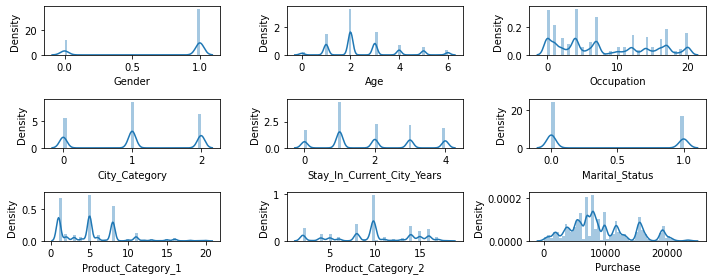

In [34]:
rows = 3
columns = 3
fig, ax = plt.subplots(nrows = rows, ncols = columns, figsize = (10,4))
col = bf_sales.columns
index = 2  # this is 2 as I am starting to iterate from Gender column and leaving out User_ID and Product_ID columns

for i in range(rows):
    for j in range(columns):
        sns.distplot(bf_sales[col[index]], ax = ax[i][j]) #each small graph will be a distribution plot 
        index = index + 1
        
plt.tight_layout()    
plt.show()


Here, each bf_sales[col[index]] is x-axis of the distribution plot and ax = ax[i][j] is the y-axis. We can see that the  distribution of the Purchase column shows a skewness towards the right. In such cases, we can apply the log transformation to make it a normal distribution.

Zooming in the Purchase plot:

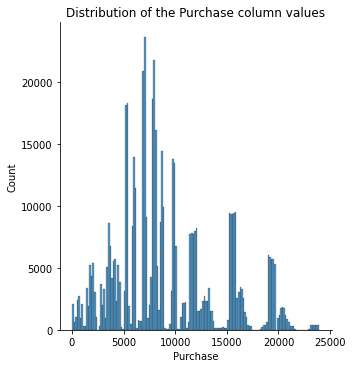

In [35]:
# Seeing the skewnwss in the Purchase variable
j = sns.displot(bf_sales['Purchase'], kde = False) #setting the kernel density as false
j.set(title = "Distribution of the Purchase column values")
plt.show()

## Log Transformation

The log transformation is, arguably, the most popular among the different types of transformations used to transform skewed data to approximately conform to normality. If the original data follows a log-normal distribution or approximately so, then the log-transformed data follows a normal or near normal distribution.

In [36]:
bf_sales["Purchase"] = np.log(bf_sales["Purchase"])

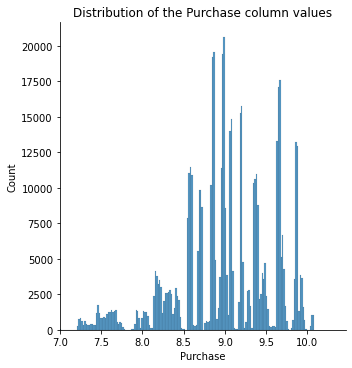

In [37]:
## The log transformation will help transform the data and change it to normal distribution
k = sns.displot(bf_sales['Purchase'], kde = False) #setting the kernel density as false
k.set(title = "Distribution of the Purchase column values")
# control x and y limits
#plt.ylim(0, 20)
plt.xlim(7, None)
plt.show()

We can see that this is plot is not right skewed anymore and is almost a normal distribution.

In [38]:
bf_sales.head(20)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,1000001,-1.028774,0,0,10,0,2,0,3,9.842329,9.032409
1,1000001,0.722139,0,0,10,0,2,0,1,6.000000,9.629051
2,1000001,-0.845799,0,0,10,0,2,0,12,9.842329,7.259820
3,1000001,-0.869157,0,0,10,0,2,0,12,14.000000,6.963190
4,1000002,1.077382,1,6,16,2,4,0,8,9.842329,8.983314
5,1000003,0.182947,1,2,15,0,3,0,1,2.000000,9.630825
6,1000004,0.099246,1,4,7,1,2,1,1,8.000000,9.863447
7,1000004,1.668157,1,4,7,1,2,1,1,15.000000,9.671177
8,1000004,-0.754312,1,4,7,1,2,1,1,16.000000,9.660524
9,1000005,0.975189,1,2,20,0,1,1,8,9.842329,8.970940


In [39]:
# The get_dummies() function is used to convert categorical variable into dummy/indicator variables
bf_sales = pd.get_dummies(bf_sales)
bf_sales.head()

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase,City_Category_0,City_Category_1,City_Category_2
0,1000001,-1.028774,0,0,10,2,0,3,9.842329,9.032409,1,0,0
1,1000001,0.722139,0,0,10,2,0,1,6.000000,9.629051,1,0,0
2,1000001,-0.845799,0,0,10,2,0,12,9.842329,7.259820,1,0,0
3,1000001,-0.869157,0,0,10,2,0,12,14.000000,6.963190,1,0,0
4,1000002,1.077382,1,6,16,4,0,8,9.842329,8.983314,0,0,1


I am using the dummies function to convert categorical variable, City_Category into dummy/indicator variables. Using pd.get_dummies(), I get additional 3 columns: City_Category_0, City_Category_1 and City_Category_2, Which were not there in the previous dataset.

## Train test split

Before splitting our data into train and test parts, we need to separate the dependent and independent columns from the dataset. I am considering the 'Purchase' column as the response variable/ dependent variable.  So, I have removed the 'Purchase' column using the drop function and given it on Y.

The data is split into X and Y where X is the independent dataset and Y is the dependent data variable, which have been separated.

In [40]:
X = bf_sales.drop(labels = ['Purchase'], axis = 1)
Y = bf_sales['Purchase']
X.head()

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,City_Category_0,City_Category_1,City_Category_2
0,1000001,-1.028774,0,0,10,2,0,3,9.842329,1,0,0
1,1000001,0.722139,0,0,10,2,0,1,6.000000,1,0,0
2,1000001,-0.845799,0,0,10,2,0,12,9.842329,1,0,0
3,1000001,-0.869157,0,0,10,2,0,12,14.000000,1,0,0
4,1000002,1.077382,1,6,16,4,0,8,9.842329,0,0,1


The data is split into X and Y where independent and dependent variables have been separated. We have all the columns in the above dataframe except for the 'Purchase' column.

In [41]:
Y  #Target Column (all the Purchases)

0         9.032409
1         9.629051
2         7.259820
3         6.963190
4         8.983314
            ...   
550063    5.908083
550064    5.916202
550065    4.919981
550066    5.899897
550067    6.194405
Name: Purchase, Length: 550068, dtype: float64

## Using 80 percent of the data for training purpose and 20 percent for testing

The train_test_split() Split arrays or matrices into random train and test subsets.

train_test_split():
train_test_split is a function in Sklearn model selection for splitting data arrays into two subsets: for training data and for testing data. With this function, you don't need to divide the dataset manually.

By default, Sklearn train_test_split will make random partitions for the two subsets. However, you can also specify a random state for the operation.

Parameters:
X, y. The first parameter is the dataset you're selecting to use.

train_size: This parameter sets the size of the training dataset. There are three options: None, which is the default, Int, which requires the exact number of samples, and float, which ranges from 0.1 to 1.0.

test_size: This parameter specifies the size of the testing dataset. The default state suits the training size. It will be set to 0.25 if the training size is set to default.

random_state: The default mode performs a random split using np.random. Alternatively, you can add an integer using an exact number. It's like setting a seed so that anyone who performs the calculation gets the same values.

In [42]:
# Splitting the data into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, test_size = 0.2, random_state = 0)
print("X_train shape: ", X_train.shape)
print("Y_train shape: ", Y_train.shape)
print("X_test shape: ", X_test.shape)
print("Y_test shape: ", Y_test.shape)

X_train shape:  (440054, 12)
Y_train shape:  (440054,)
X_test shape:  (110014, 12)
Y_test shape:  (110014,)


In [43]:
# StandardScaler standardizes a feature by subtracting the mean and then scaling to unit variance
# It transforms the data in such a manner that it has mean as 0 and standard deviation as 1
scaled = StandardScaler()
X_train = scaled.fit_transform(X_train)
X_test = scaled.transform(X_test)

## Machine Learning Models

#### Linear Regression

In [44]:
model = LinearRegression()
model.fit(X_train, Y_train) #fitting the model on the training data

LinearRegression()

In [45]:
# Predicting on X_test
Y_predict = model.predict(X_test)

In [46]:
r_squared = r2_score(Y_test, Y_predict)
mae = mean_absolute_error(Y_test, Y_predict)
mse = mean_squared_error(Y_test, Y_predict)
rmse = (np.sqrt(mean_squared_error(Y_test, Y_predict)))

print('R-squared score: ', r_squared)
print('Mean Absolute Error (MSE): ', mae)
print('Mean Squared Error (MSE): ', mse)
print('Root Mean Squared Error: ', rmse)

R-squared score:  0.20164217144057284
Mean Absolute Error (MSE):  0.45565426281778415
Mean Squared Error (MSE):  0.44379643744168806
Root Mean Squared Error:  0.6661804841345085


The above evaluation metrics help us to find how well our model is performing. As we can see the R-squared score is only 0.20 and as the Root mean square error is high. Hence, the model is not very accurate to predict the purchases or the target column.

#### Decision Tree Regressor

In [47]:
DT =  DecisionTreeRegressor(max_depth = 9)
DT.fit(X_train, Y_train)

DecisionTreeRegressor(max_depth=9)

In [48]:
# predicting on train set
train_preds_DT = DT.predict(X_train)

# predicting on test set
test_preds_DT = DT.predict(X_test)

In [49]:
r_squared_train = DT.score(X_train, Y_train)
r_squared_test = DT.score(X_test, Y_test)

RMSE_train = (np.sqrt(metrics.mean_squared_error(Y_train, train_preds_DT)))
RMSE_test = (np.sqrt(metrics.mean_squared_error(Y_test, test_preds_DT)))

print('R-squared value on train:', r_squared_train)
print('R-squared value on test:', r_squared_test)
print('-'*50)
print("RMSE Training Data = ", str(RMSE_train))
print("RMSE Test Data = ", str(RMSE_test))

R-squared value on train: 0.7519510621944241
R-squared value on test: 0.7551559765032988
--------------------------------------------------
RMSE Training Data =  0.3680408214406252
RMSE Test Data =  0.3689248127165716


The Decision Tree Regressor is better compared to Linear Regression as it can be observed that the root mean square error is less as compared to the previous model and the R-Squared value is higher in this model.bf_sales.dtypes 

In [50]:
bf_sales.dtypes 

User_ID                         int64
Product_ID                    float64
Gender                          int64
Age                             int64
Occupation                      int64
Stay_In_Current_City_Years      int64
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Purchase                      float64
City_Category_0                 uint8
City_Category_1                 uint8
City_Category_2                 uint8
dtype: object

## Loading the test dataset

Now, we need to load the test dataset and the data preprocessing that was done on the training dataset such as label encoding the columns, and converting the datatype, removing a column, all have to be done.

In [51]:
# Loading test dataset
bf_sales_test = pd.read_csv('test.csv')

In [52]:
bf_sales_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [53]:
bf_sales_test.shape

(233599, 11)

In [54]:
# Checking for missing values present in the test dataset
bf_sales_test.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2             72344
Product_Category_3            162562
dtype: int64

## Preprocessing the Data for the test set

In [55]:
# The 'P00' value has been replaced int the ProductId column and the column has been scaled
bf_sales_test['Product_ID'] = bf_sales_test['Product_ID'].str.replace('P00', '')
ss = StandardScaler()
bf_sales_test['Product_ID'] = ss.fit_transform(bf_sales_test['Product_ID'].values.reshape(-1, 1))

In [56]:
# As the Product_Category_3 column in the train set had been removed, same process has been done here too
bf_sales_test.drop(['Product_Category_3'], axis = 1, inplace = True)

In [57]:
# Product_Category_2 column has been imputed with mean
bf_sales_test['Product_Category_2'] = bf_sales_test['Product_Category_2'].fillna(bf_sales_test['Product_Category_2'].mean())

In [58]:
bf_sales_test.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
dtype: int64

We can see there are no null values in the test dataframe as well.

In [59]:
bf_sales_test.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2
0,1000004,-0.434752,M,46-50,7,B,2,1,1,11.0
1,1000009,-0.587188,M,26-35,17,C,0,0,3,5.0
2,1000010,1.133865,F,36-45,1,B,4+,1,5,14.0
3,1000010,-0.273465,F,36-45,1,B,4+,1,4,9.0
4,1000011,-1.173330,F,26-35,1,C,1,0,4,5.0
5,1000013,1.743609,M,46-50,1,C,3,1,2,3.0
6,1000013,-0.174136,M,46-50,1,C,3,1,1,11.0
7,1000013,-0.773062,M,46-50,1,C,3,1,2,4.0
8,1000015,-0.111194,M,26-35,7,A,1,0,10,13.0
9,1000022,-1.034662,M,18-25,15,A,4+,0,5,14.0


In [60]:
bf_sales_test.shape

(233599, 10)

## Label Encoding few columns in the test dataset

In [61]:
#initial datatypes of the variables
bf_sales_test.dtypes

User_ID                         int64
Product_ID                    float64
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
dtype: object

In [62]:
# The label encoding technique will now replace all the categorical variables to numeric for easier computation
categorical_cols_test = ['Gender','City_Category','Age']
le = LabelEncoder()
for i in categorical_cols_test:
    bf_sales_test[i]=le.fit_transform(bf_sales_test[i])
    
bf_sales_test.dtypes

User_ID                         int64
Product_ID                    float64
Gender                          int64
Age                             int64
Occupation                      int64
City_Category                   int64
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
dtype: object

In [63]:
# The 4+ value in the Stay_In_Current_City_Years have been replaced with only 4
bf_sales_test['Stay_In_Current_City_Years'] = bf_sales_test['Stay_In_Current_City_Years'].replace('4+','4')

In [64]:
# The values in the test set have been converted to integer types as done in the train set
bf_sales_test['Gender'] = bf_sales_test['Gender'].astype(int)
bf_sales_test['Age'] = bf_sales_test['Age'].astype(int)
bf_sales_test['Stay_In_Current_City_Years'] = bf_sales_test['Stay_In_Current_City_Years'].astype(int)
bf_sales_test['City_Category'] = bf_sales_test['City_Category'].astype('category')

In [65]:
# Dummies are created for the test set
bf_sales_test = pd.get_dummies(bf_sales_test)

In [66]:
bf_sales_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,City_Category_0,City_Category_1,City_Category_2
0,1000004,-0.434752,1,4,7,2,1,1,11.0,0,1,0
1,1000009,-0.587188,1,2,17,0,0,3,5.0,0,0,1
2,1000010,1.133865,0,3,1,4,1,5,14.0,0,1,0
3,1000010,-0.273465,0,3,1,4,1,4,9.0,0,1,0
4,1000011,-1.173330,0,2,1,1,0,4,5.0,0,0,1


## Shape of the train data

In [67]:
bf_sales.shape

(550068, 13)

## Shape of the test data

In [68]:
bf_sales_test.shape

(233599, 12)

The number of columns in the test data set is one less than that of the train dataset as it does not have the 'Purchase' column. We are supposed to predict that column based on this trained data sets' machine learning.

In [69]:
bf_sales.head()

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase,City_Category_0,City_Category_1,City_Category_2
0,1000001,-1.028774,0,0,10,2,0,3,9.842329,9.032409,1,0,0
1,1000001,0.722139,0,0,10,2,0,1,6.000000,9.629051,1,0,0
2,1000001,-0.845799,0,0,10,2,0,12,9.842329,7.259820,1,0,0
3,1000001,-0.869157,0,0,10,2,0,12,14.000000,6.963190,1,0,0
4,1000002,1.077382,1,6,16,4,0,8,9.842329,8.983314,0,0,1


In [70]:
bf_sales_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,City_Category_0,City_Category_1,City_Category_2
0,1000004,-0.434752,1,4,7,2,1,1,11.0,0,1,0
1,1000009,-0.587188,1,2,17,0,0,3,5.0,0,0,1
2,1000010,1.133865,0,3,1,4,1,5,14.0,0,1,0
3,1000010,-0.273465,0,3,1,4,1,4,9.0,0,1,0
4,1000011,-1.173330,0,2,1,1,0,4,5.0,0,0,1


Next I used the Decision Tree Regressor Model and predicted on the test data set.

In [71]:
test_predict = DT.predict(bf_sales_test)
len(test_predict)

233599

In [72]:
test_predict.shape

(233599,)

In [73]:
# Saving it into a dataframe
id_frame = pd.read_csv('test.csv')
id_frame.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [74]:
id_frame.shape

(233599, 11)

The number of columns has increased from 10 to 11.

In [75]:
# Using User_Id and Product_Id from the test set
ID_info = id_frame[['User_ID' , 'Product_ID', 'Gender', 'Age', 'City_Category']]
ID_info.head()

,User_ID,Product_ID,Gender,Age,City_Category
0,1000004,P00128942,M,46-50,B
1,1000009,P00113442,M,26-35,C
2,1000010,P00288442,F,36-45,B
3,1000010,P00145342,F,36-45,B
4,1000011,P00053842,F,26-35,C


In [76]:
predictions = pd.DataFrame(test_predict, columns = ['Purchase'])
predictions.head()

,Purchase
0,9.859582
1,9.837007
2,3.637586
3,3.637586
4,3.871201


In [77]:
# Concatenating the Purchase value to the dataframe 
predictions['User_ID'] = ID_info['User_ID']
predictions['Product_ID'] = ID_info['Product_ID']
predictions['Gender'] = ID_info['Gender']
predictions['Age'] = ID_info['Age']
predictions['City_Category'] = ID_info['City_Category']
predictions.head(10)

,Purchase,User_ID,Product_ID,Gender,Age,City_Category
0,9.859582,1000004,P00128942,M,46-50,B
1,9.837007,1000009,P00113442,M,26-35,C
2,3.637586,1000010,P00288442,F,36-45,B
3,3.637586,1000010,P00145342,F,36-45,B
4,3.871201,1000011,P00053842,F,26-35,C
5,6.485274,1000013,P00350442,M,46-50,C
6,9.859582,1000013,P00155442,M,46-50,C
7,6.645353,1000013,P0094542,M,46-50,C
8,3.258097,1000015,P00161842,M,26-35,A
9,3.258097,1000022,P00067942,M,18-25,A


We can see above that the predicted column is the predicted value.

In [78]:
# Converting the prediction/dataframe into the csv format
predictions.to_csv('Black_Friday_Sales_Prediction.csv', index = False)

So, this is how the Machine Learning model was used on the Black Friday Sales dataset.

In [79]:
# Reading the predicted csv file
pred = pd.read_csv('Black_Friday_Sales_Prediction.csv')
pred.head()

,Purchase,User_ID,Product_ID,Gender,Age,City_Category
0,9.859582,1000004,P00128942,M,46-50,B
1,9.837007,1000009,P00113442,M,26-35,C
2,3.637586,1000010,P00288442,F,36-45,B
3,3.637586,1000010,P00145342,F,36-45,B
4,3.871201,1000011,P00053842,F,26-35,C


#### Predicted Age group with the maximum and minimum purchases

In [80]:
age_purchase_predicted = pred.groupby(['Age'])['Purchase'].mean()
age_purchase_predicted_sorted = pd.DataFrame(age_purchase_predicted.sort_values(ascending = False))
age_purchase_predicted_sorted

,Purchase
Age,
0-17,5.839663
18-25,5.734713
26-35,5.592893
36-45,5.566226
51-55,5.461550
46-50,5.416603
55+,5.314533


#### Predicted Count of Purchases made by each Gender

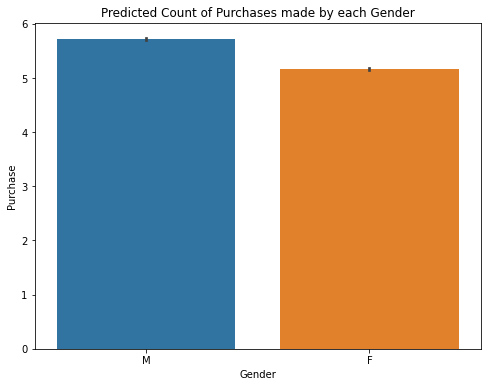

In [81]:
plt.figure(figsize = (8,6))
l = sns.barplot(x = 'Gender', y = 'Purchase', data = pred)
l.set(title = "Predicted Count of Purchases made by each Gender")
plt.show()

We can see that the predicted data also shows an interesting observation that the number of females was less than the number of men who shopped during Black Friday.